In [126]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [127]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Excelr Projects/Predictive Maintenance dataset/Maintenance.xlsx', sheet_name="Maintenance")

In [128]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1000000000,308.6000000000,1551,42.8000000000,0,0,0,0,0,0,0
1,2,L47181,L,298.2000000000,308.7000000000,1408,46.3000000000,3,0,0,0,0,0,0
2,3,L47182,L,298.1000000000,308.5000000000,1498,49.4000000000,5,0,0,0,0,0,0
3,4,L47183,L,298.2000000000,308.6000000000,1433,39.5000000000,7,0,0,0,0,0,0
4,5,L47184,L,298.2000000000,308.7000000000,1408,40.0000000000,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8000000000,308.4000000000,1604,29.5000000000,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9000000000,308.4000000000,1632,31.8000000000,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0000000000,308.6000000000,1645,33.4000000000,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0000000000,308.7000000000,1408,48.5000000000,25,0,0,0,0,0,0


# EDA

1. UDI (Unique Device Identifier):
   - A unique identifier for each individual piece of equipment or component. This helps in tracking and distinguishing different units in the dataset.

2. Product ID:
   - An identifier for the specific product or item being produced by the machine. It helps in linking the machine's operational data to the particular product it was working on.

3. Type:
   - The type of machine or equipment. This could categorize machines by model, function, or any other classification relevant to the dataset. consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number.

4. Air temperature [K]:
   - The ambient air temperature around the machine, measured in Kelvin (K). This can affect the machine's performance and is a critical factor in predictive maintenance.

5. Process temperature [K]:
   - The temperature within the machine’s process, also measured in Kelvin (K). This is crucial for understanding the operating conditions of the machine and detecting potential overheating issues.

6. Rotational speed [rpm]:
   - The speed at which the machine’s components are rotating, measured in revolutions per minute (rpm). This metric is important for assessing the machine's operational load and wear.
calculated from a power of 2860 W, overlaid with a normally distributed noise

7. Torque [Nm]:
   - The amount of torque being applied by the machine, measured in Newton-meters (Nm). Torque is a key factor in understanding the machine's operational strain and potential failure points.

8. Tool wear [min]:
   - The amount of wear experienced by the machine's tool, measured in minutes. This helps in predicting when a tool might need to be replaced or serviced. The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.

9. Machine failure:
   - A binary indicator (0 or 1) showing whether the machine has failed (1) or not (0). This is the target variable for predictive maintenance models.

The machine failure consists of five independent failure modes

1. TWF (Tool Wear Failure):
    - A binary indicator showing if the failure was due to tool wear. This provides specific information about the cause of the machine failure.

2. HDF (Heat Dissipation Failure):
    - A binary indicator showing if the failure was due to issues with heat dissipation. This helps in identifying temperature-related failures.

3. PWF (Power Failure):
    - A binary indicator showing if the failure was due to power-related issues. This can help in diagnosing failures related to electrical problems.

4. OSF (Overstrain Failure):
    - A binary indicator showing if the failure was due to overstrain. This indicates failures caused by mechanical overloading or excessive force.

5. RNF (Random Failure):
    - A binary indicator showing if the failure was due to random, unforeseen factors. This helps in categorizing failures that don't fit into the other predefined categories.

In [129]:
df['UDI'].unique().size

10000

In [130]:
df['Product ID'].unique().size

10000

In [131]:
# we don't need UDI & Product ID
df = df.drop(columns=['UDI', 'Product ID'])

In [132]:
df.drop_duplicates(inplace=True)

In [133]:
df.shape

(10000, 12)

In [134]:
# Checking for null values
df.isnull().sum().sum()

0

In [135]:
# checking for invalid records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


We need to remove rows where the failure category didn't matched with Machine failure i.e if any of the failure category is 1 then machine failure should be 1.

In [136]:
df.loc[

     (((df.HDF + df.OSF + df.PWF + df.TWF + df.RNF) == 0) & (df['Machine failure']==1))
     |
     (((df.HDF + df.OSF + df.PWF + df.TWF + df.RNF) >= 1) & (df['Machine failure']==0))
].shape

(27, 12)

In [80]:
df = df.drop(df.loc[
    (((df.HDF + df.OSF + df.PWF + df.TWF + df.RNF) == 0) & (df['Machine failure'] == 1))
    |
    (((df.HDF + df.OSF + df.PWF + df.TWF + df.RNF) >= 1) & (df['Machine failure'] == 0))
].index)

In [81]:
# Checking for columns containing unique values
for i in df.columns:
    print(df[i].value_counts())
    print("______________________________________")

Type
L    5984
M    2991
H     998
Name: count, dtype: int64
______________________________________
Air temperature [K]
300.7000000000    278
298.9000000000    231
297.4000000000    230
300.5000000000    228
298.8000000000    226
                 ... 
304.4000000000      7
296.0000000000      6
295.4000000000      3
295.3000000000      3
304.5000000000      1
Name: count, Length: 93, dtype: int64
______________________________________
Process temperature [K]
310.6000000000    317
310.8000000000    273
308.6000000000    265
310.7000000000    264
310.5000000000    262
                 ... 
306.9000000000      4
313.7000000000      4
305.8000000000      3
305.7000000000      2
313.8000000000      2
Name: count, Length: 82, dtype: int64
______________________________________
Rotational speed [rpm]
1452    48
1435    43
1447    41
1469    40
1429    40
        ..
2305     1
2197     1
2211     1
1905     1
2450     1
Name: count, Length: 941, dtype: int64
___________________________________

### Treating outliers

In [82]:
import seaborn as sns

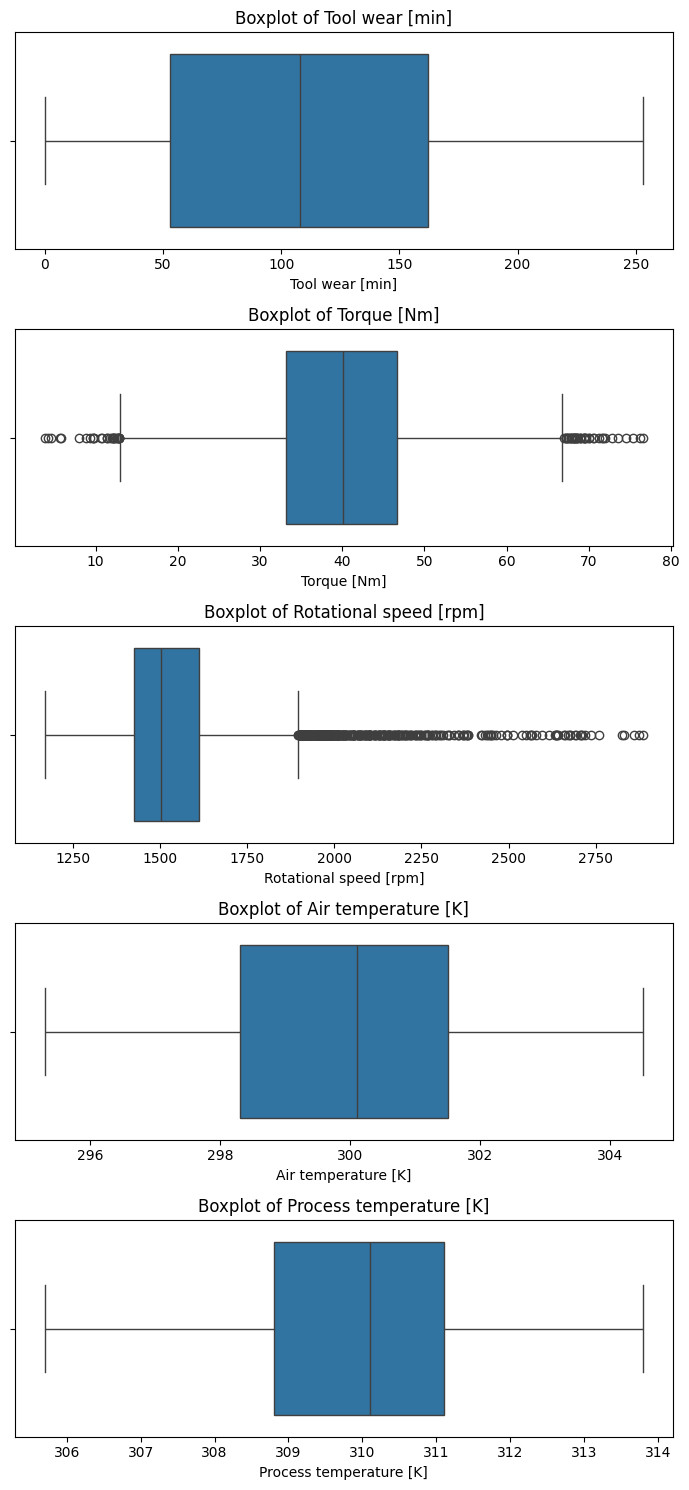

In [83]:
import matplotlib.pyplot as plt

# selecting numeric columns
numeric_columns = ['Tool wear [min]', 'Torque [Nm]', 'Rotational speed [rpm]',
                    'Air temperature [K]', 'Process temperature [K]']

# create boxplots for each numeric column
plt.figure(figsize=(7, 3 * len(numeric_columns)))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


Rotational Speed and Torque features are having outliers

In [84]:
def lower_bound(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5 * IQR

def upper_bound(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return Q3 + 1.5 * IQR

In [85]:
df.loc[ df['Rotational speed [rpm]']>upper_bound(df['Rotational speed [rpm]']), 'Rotational speed [rpm]' ] = upper_bound(df['Rotational speed [rpm]'])

In [86]:
df.loc[ df['Torque [Nm]']>upper_bound(df['Torque [Nm]']), 'Torque [Nm]' ] = upper_bound(df['Torque [Nm]'])
df.loc[ df['Torque [Nm]']<lower_bound(df['Torque [Nm]']), 'Torque [Nm]' ] = lower_bound(df['Torque [Nm]'])

# Data Visualization

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

### Distribution Plot

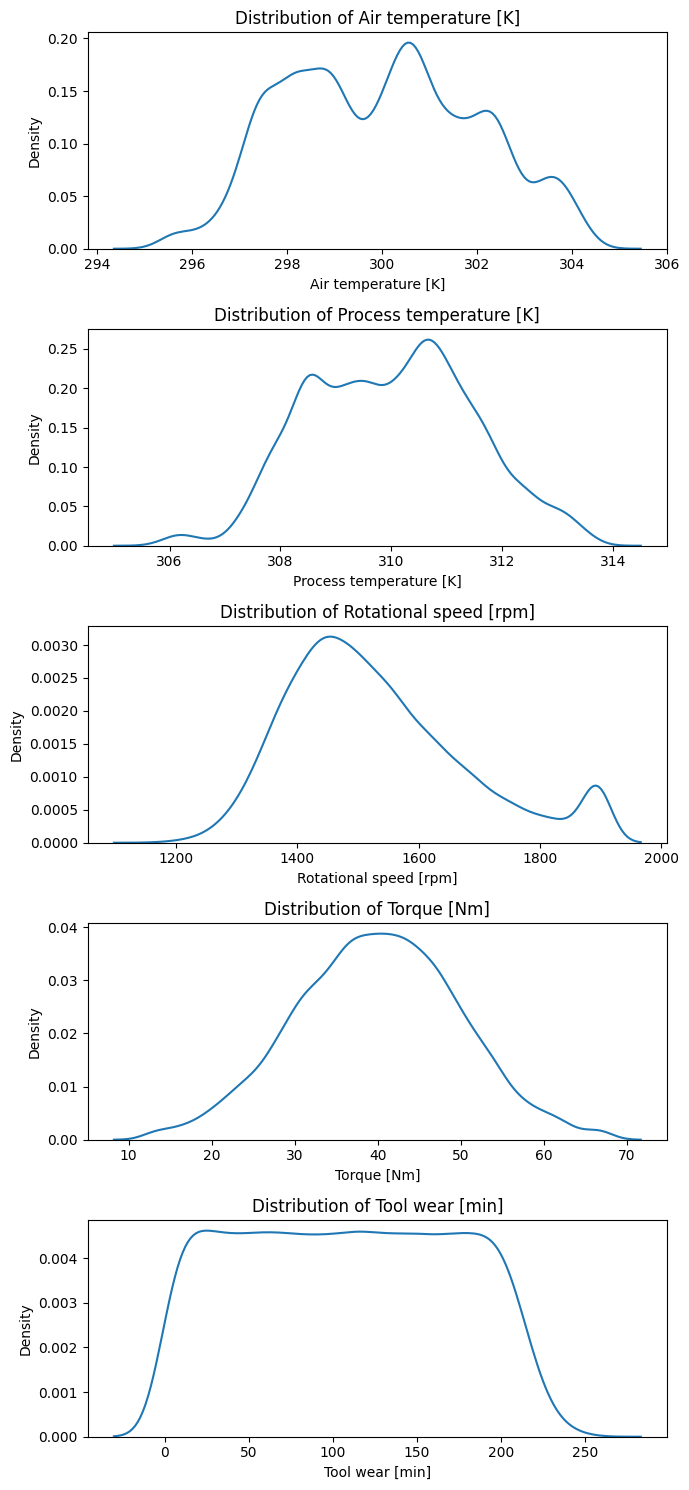

In [88]:
# selecting numeric columns
numeric_columns = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']

# create distribution for each numeric column
plt.figure(figsize=(7, 3 * len(numeric_columns)))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.kdeplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### Histogram

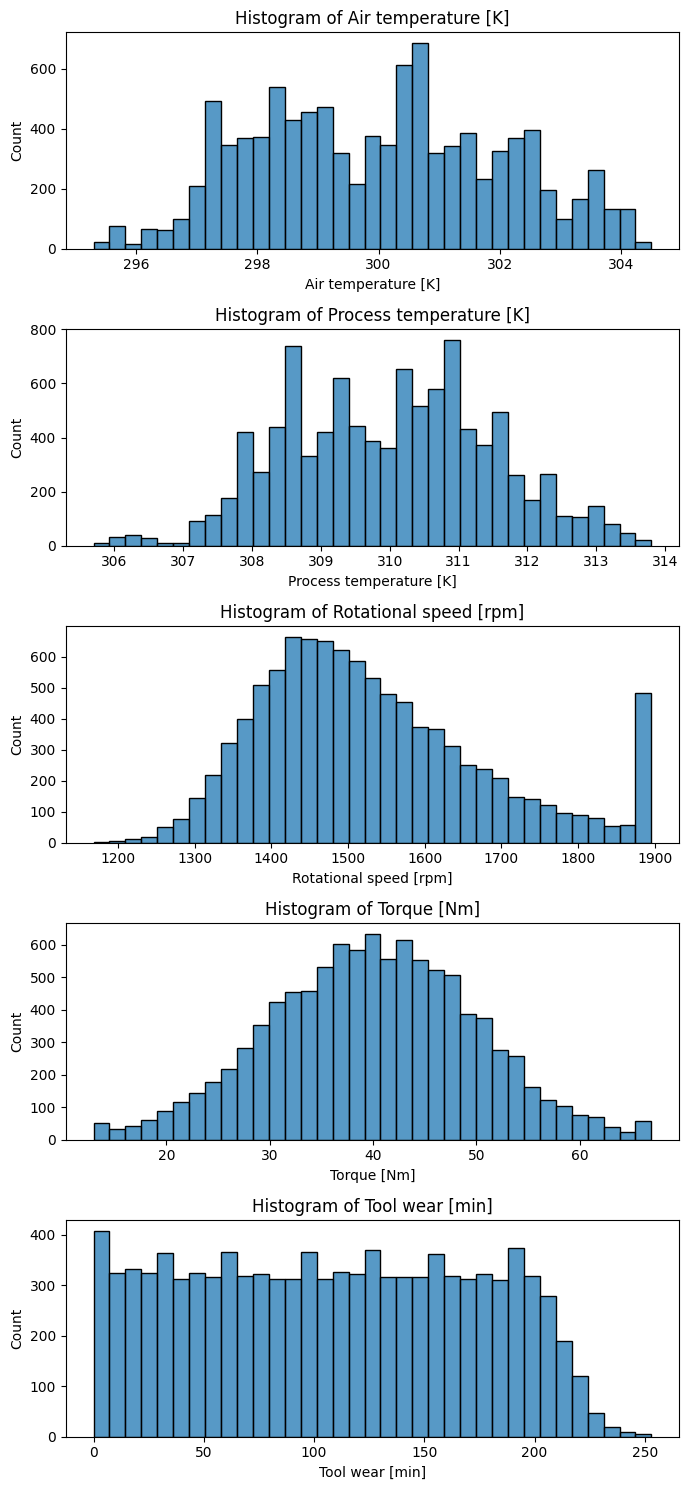

In [89]:
# selecting numeric columns
numeric_columns = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']

# create boxplots for each numeric column
plt.figure(figsize=(7, 3 * len(numeric_columns)))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.histplot(x=df[col],bins=35)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### **1. Air Temperature [K]**
- **Histogram**: Displays a multimodal distribution with peaks at approximately -1 and 0.5. The symmetry is evident but not perfect, diverging from a normal distribution.
- **Density Plot**: Reinforces the multimodal pattern with two distinct peaks, showing a concentrated spread near the center.
- **Conclusion**: Air temperature exhibits a clear bimodal or multimodal behavior, with significant clustering around the two peaks.

---

### **2. Process Temperature [K]**
- **Histogram**: Resembles the air temperature distribution, showing peaks around -1 and 0.5 with a minor skew.
- **Density Plot**: Smoothly outlines the multimodal distribution, emphasizing the skew and peak locations.
- **Conclusion**: Process temperature mirrors the bimodal nature of air temperature but includes a slight skew, indicating subtle differences in data behavior.

---

### **3. Rotational Speed [rpm]**
- **Histogram**: Mostly bell-shaped with an unexpected spike at the upper end, hinting at outliers or clustered values.
- **Density Plot**: Smoothens the distribution while confirming the spike at higher values.
- **Conclusion**: Rotational speed is nearly normally distributed but features a pronounced anomaly at higher values, suggesting potential outliers or clustered behaviors.

---

### **4. Torque [Nm]**
- **Histogram**: Normally distributed.
- **Density Plot**: Normally distributed.
- **Conclusion**: Normally distributed.

---

### **5. Tool Wear [min]**
- **Histogram**: Exhibits a nearly uniform distribution with a slight taper at the ends.
- **Density Plot**: Validates the uniformity with flat density in the middle range, tapering off towards extremes.
- **Conclusion**: Tool wear data is uniformly distributed, showing no prominent clusters or patterns apart from a mild decrease at the extremes.

### Bar Plot

<Axes: xlabel='Machine failure', ylabel='count'>

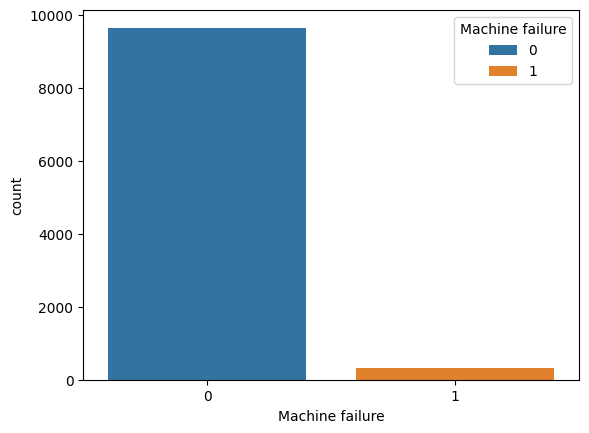

In [90]:
sns.countplot(x='Machine failure',data=df,hue='Machine failure')

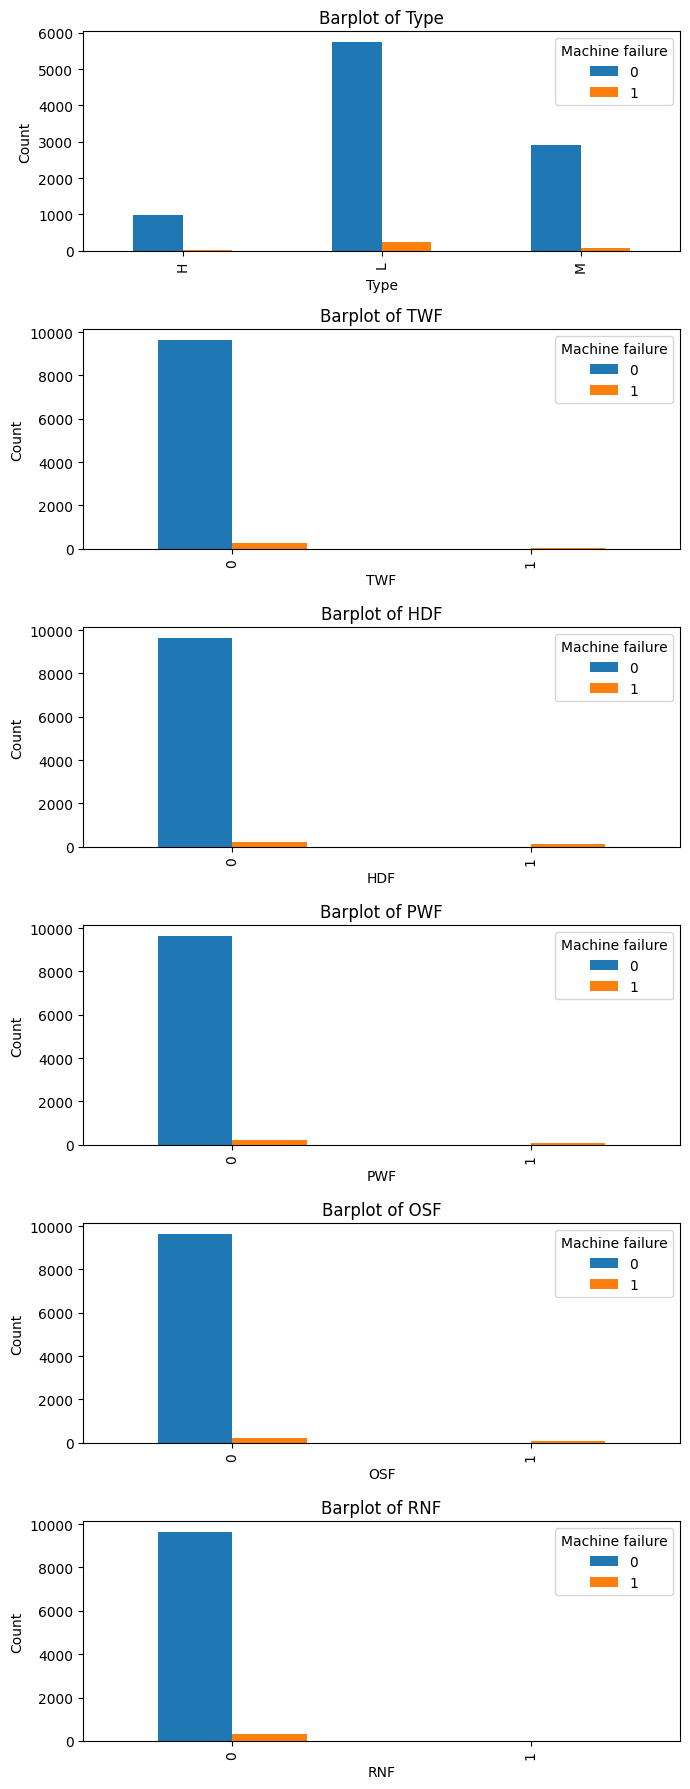

In [91]:
cat_columns = ['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']
# create bar plots for each categorical column
plt.figure(figsize=(7, 3 * len(cat_columns)))
for i, col in enumerate(cat_columns, start=1):
    plt.subplot(len(cat_columns), 1, i)
    counts = df[[col, 'Machine failure']].groupby([col, 'Machine failure']).size().unstack(fill_value=0)
    counts.plot(kind='bar', ax=plt.gca())
    plt.title(f'Barplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

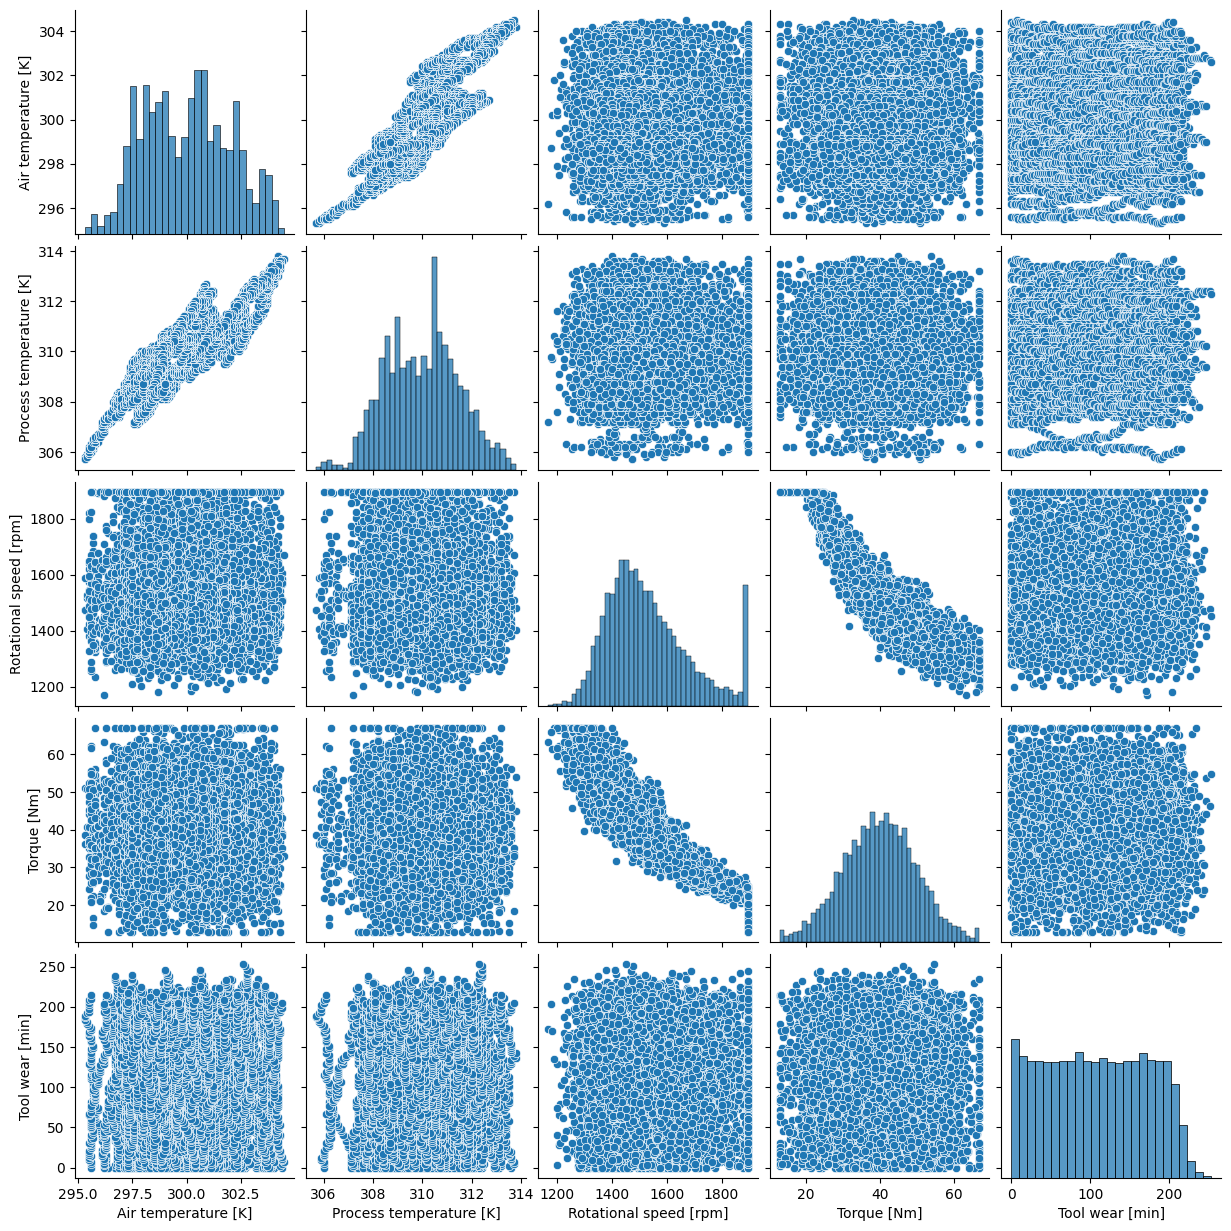

In [92]:
sns.pairplot(df[numeric_columns])

Air temperature and Process temperature are highly +ve correlated

Rotational Speed rpm and Torque Nm are highly -ve correlated

### One hot encoding

In [93]:
dfohe = pd.get_dummies(df, columns=['Type'])

In [94]:
dfohe.replace({True:1, False:0},inplace=True)

In [95]:
dfohe.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1000000000,308.6000000000,1551.0000000000,42.8000000000,0,0,0,0,0,0,0,0,0,1
1,298.2000000000,308.7000000000,1408.0000000000,46.3000000000,3,0,0,0,0,0,0,0,1,0
2,298.1000000000,308.5000000000,1498.0000000000,49.4000000000,5,0,0,0,0,0,0,0,1,0
3,298.2000000000,308.6000000000,1433.0000000000,39.5000000000,7,0,0,0,0,0,0,0,1,0
4,298.2000000000,308.7000000000,1408.0000000000,40.0000000000,9,0,0,0,0,0,0,0,1,0


## Synthetic Minority Over-sampling Technique (SMOTE)

In [96]:
from imblearn.over_sampling import SMOTENC

X = dfohe.drop(columns=['Machine failure'])
y = dfohe['Machine failure']

categorical_features = list(range(5,13))  # Indices of categorical columns

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features = categorical_features, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

dfohe_over_samp = pd.concat([X_resampled, y_resampled], axis=1)
dfohe_over_samp.head(3)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Machine failure
0,298.1000000000,308.6000000000,1551.0000000000,42.8000000000,0,0,0,0,0,0,0,0,1,0
1,298.2000000000,308.7000000000,1408.0000000000,46.3000000000,3,0,0,0,0,0,0,1,0,0
2,298.1000000000,308.5000000000,1498.0000000000,49.4000000000,5,0,0,0,0,0,0,1,0,0


## Standardization

In [97]:
from sklearn.preprocessing import StandardScaler

c = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Initialize the scaler
scaler = StandardScaler()

# Standardizing imbalanced data
dfohe_std = dfohe.copy()
dfohe_std[c] = scaler.fit_transform(dfohe_std[c])

# Standardizing balanced data
dfohe_over_samp_std = dfohe_over_samp.copy()
dfohe_over_samp_std[c] = scaler.fit_transform(dfohe_over_samp_std[c])


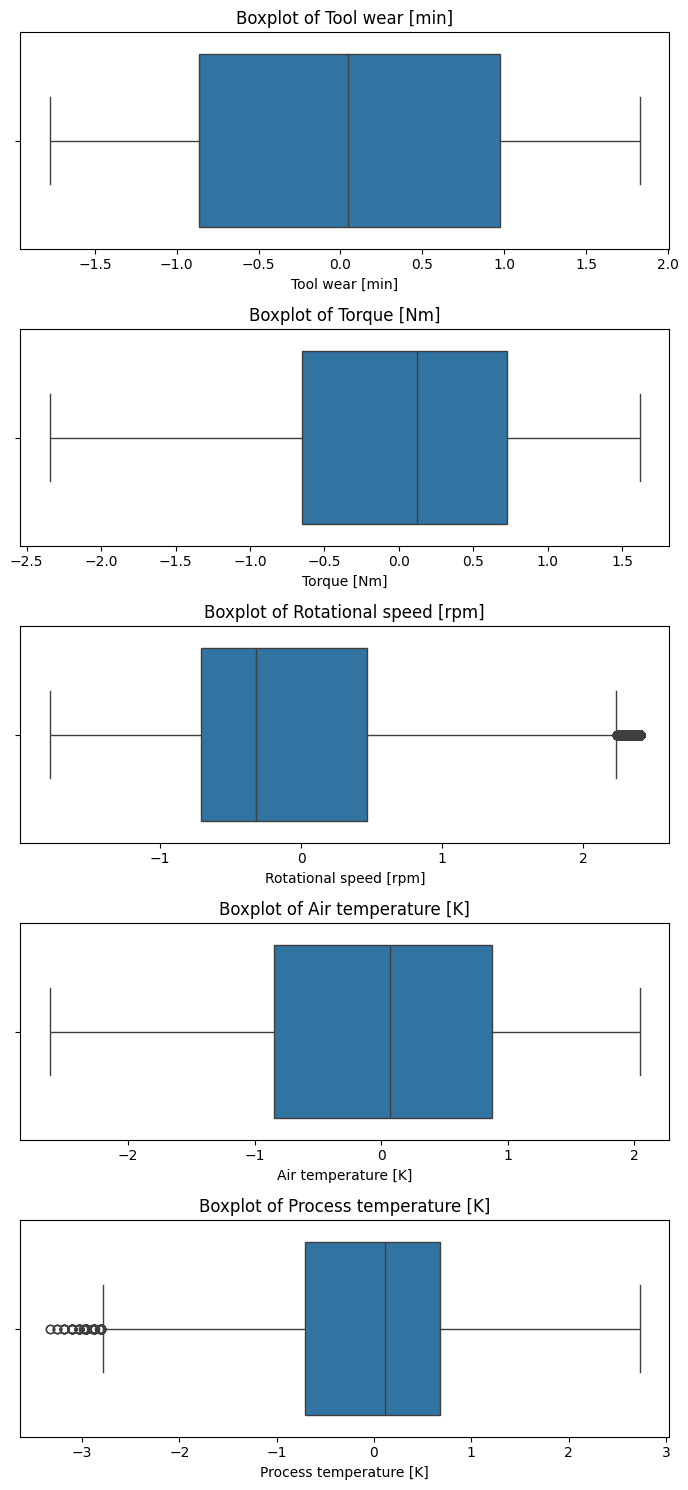

In [98]:
# treating outliers in oversampled data
import matplotlib.pyplot as plt

# selecting numeric columns
numeric_columns = ['Tool wear [min]', 'Torque [Nm]', 'Rotational speed [rpm]',
                    'Air temperature [K]', 'Process temperature [K]']

# create boxplots for each numeric column
plt.figure(figsize=(7, 3 * len(numeric_columns)))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=dfohe_over_samp_std[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [99]:
# Treating outliers in dfohe_over_samp_std
dfohe_over_samp_std.loc[ dfohe_over_samp_std['Rotational speed [rpm]']>upper_bound(dfohe_over_samp_std['Rotational speed [rpm]']), 'Rotational speed [rpm]' ] = upper_bound(dfohe_over_samp_std['Rotational speed [rpm]'])
dfohe_over_samp_std.loc[ dfohe_over_samp_std['Process temperature [K]']<lower_bound(dfohe_over_samp_std['Process temperature [K]']), 'Process temperature [K]' ] = lower_bound(dfohe_over_samp_std['Process temperature [K]'])

In [100]:
# Treating outliers in dfohe_over_samp
dfohe_over_samp.loc[ dfohe_over_samp['Rotational speed [rpm]']>upper_bound(dfohe_over_samp['Rotational speed [rpm]']), 'Rotational speed [rpm]' ] = upper_bound(dfohe_over_samp['Rotational speed [rpm]'])
dfohe_over_samp.loc[ dfohe_over_samp['Process temperature [K]']<lower_bound(dfohe_over_samp['Process temperature [K]']), 'Process temperature [K]' ] = lower_bound(dfohe_over_samp['Process temperature [K]'])

In [101]:
dfohe_over_samp['Machine failure'].value_counts()

,count
Machine failure,
0,9643
1,9643


The classes are perfectly balaced.

In [102]:
x_cols = list(dfohe_over_samp.columns)
x_cols.remove('Machine failure')
y_col = ['Machine failure']
x_cols_all = x_cols[:]

<Axes: title={'center': 'Imbalanced dataset'}>

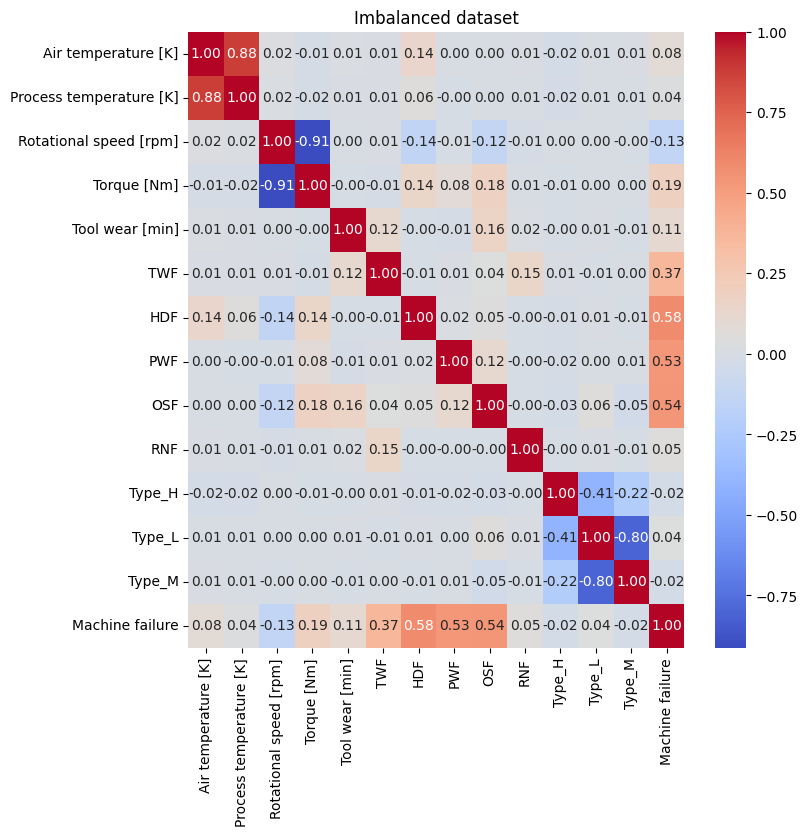

In [103]:
# Imbalanced dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.title("Imbalanced dataset")
sns.heatmap(dfohe[x_cols+y_col].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

<Axes: title={'center': 'Balanced dataset'}>

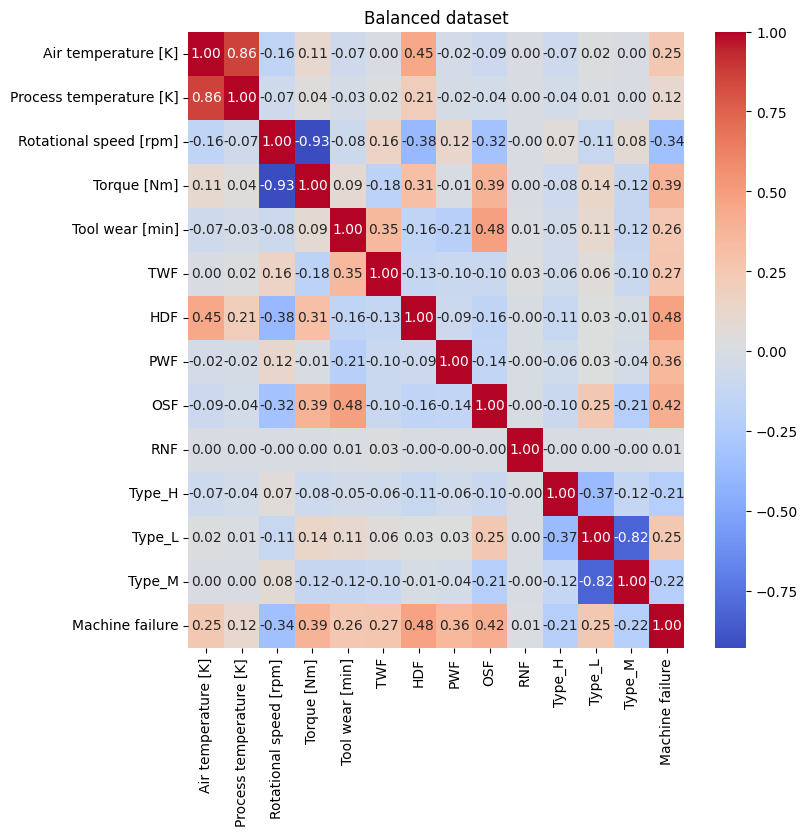

In [104]:
# Balanced dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Balanced dataset")
sns.heatmap(dfohe_over_samp_std[x_cols+y_col].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

Air temperature & Process temperature are +ve correlated

RPM & Torque are -ve correlated

if any of the failure mode = 1 then Machine failure = 1

## End of EDA and Visualization
___________________________________________________________

# Feature engineering

## Recersive Feature Elimination with Cross-Validation

In [106]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


# Assuming X and y are defined
X = dfohe_over_samp_std[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]', 'Type_H', 'Type_L', 'Type_M']]
y = dfohe_over_samp_std[['Machine failure']]

# print(X.columns, y.columns)

lt = [
        RandomForestClassifier(), LogisticRegression(), SVC(kernel='linear'),
        DecisionTreeClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()
    ]

for model in lt:

    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5)

    # Initialize RFECV
    rfecv = RFECV(
        estimator=model,
        step=1,
        cv=cv,
        scoring='accuracy',  # Metric for evaluation
        n_jobs=-1
    )


    # Fit RFE to the data
    rfecv = rfecv.fit(X, y)

    # Get the selected features and their rankings
    feature_ranking = pd.DataFrame({
        'Feature': X.columns,
        'Ranking': rfecv.ranking_
    })

    # Filter selected features and sort by ranking
    selected_features = feature_ranking[feature_ranking['Ranking'] == 1]
    selected_features = selected_features.sort_values(by='Ranking', ascending=True)

    print(f"___________ {type(model).__name__} _____________")
    print(selected_features['Feature'].tolist())
    print("\n")


___________ RandomForestClassifier _____________
['Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


___________ LogisticRegression _____________
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H', 'Type_L', 'Type_M']


___________ SVC _____________
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H', 'Type_L', 'Type_M']


___________ DecisionTreeClassifier _____________
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H', 'Type_M']


___________ AdaBoostClassifier _____________
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


___________ GradientBoostingClassifier _____________
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 

### XGBoost feature selection

In [107]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = dfohe_over_samp_std[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]', 'Type_H', 'Type_L', 'Type_M']]
y = dfohe_over_samp_std[['Machine failure']]

# Clean feature names
X.columns = X.columns.str.replace(r"[\[\]<]", "", regex=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y['Machine failure'])

for i in [3,4,5,6,7,8]:
    # Initialize and fit the XGBoost model
    xgb_clf = XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42)
    xgb_clf.fit(X_train, y_train)

    # Get feature importances
    importances = xgb_clf.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": X.columns,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # Select top i features
    top_features = feature_importance_df.head(i)["Feature"].values
    print("Top Features:", top_features)

    # Reduce the dataset to only the top features
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]

    # Refit the model on the reduced feature set
    xgb_clf.fit(X_train_selected, y_train)

    # Evaluate the model
    y_pred = xgb_clf.predict(X_test_selected)
    print(classification_report(y_test, y_pred))
    print("_"*57)


Top Features: ['Rotational speed rpm' 'Torque Nm' 'Tool wear min']
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1929
           1       0.92      0.98      0.95      1929

    accuracy                           0.95      3858
   macro avg       0.95      0.95      0.95      3858
weighted avg       0.95      0.95      0.95      3858

_________________________________________________________
Top Features: ['Rotational speed rpm' 'Torque Nm' 'Tool wear min' 'Type_H']
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1929
           1       0.92      0.98      0.95      1929

    accuracy                           0.95      3858
   macro avg       0.95      0.95      0.95      3858
weighted avg       0.95      0.95      0.95      3858

_________________________________________________________
Top Features: ['Rotational speed rpm' 'Torque Nm' 'Tool wear min' 'Type_H' 'Type_M']
  

### All features are giving more metric scores.

# Feature Engineering - Feature Importance
### Feature Importance with tree classifiers

In [108]:
# Feature Importance with tree classifiers
from pandas import read_csv
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

X = dfohe_over_samp_std[['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]', 'Type_H', 'Type_L', 'Type_M']]
Y = dfohe_over_samp_std[['Machine failure']]

for i in [DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), ExtraTreesClassifier()]:
    # feature extraction
    print("_"*20, type(i).__name__, "_"*20)
    model = i
    model.fit(X, Y)
    feature_importance_df = pd.DataFrame({
        'Feature': list(X.columns),
        'Importance': model.feature_importances_
    })

    # Sort by importance
    sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print(sorted_df)

____________________ DecisionTreeClassifier ____________________
                   Feature   Importance
2   Rotational speed [rpm] 0.3543436928
3              Torque [Nm] 0.3288488084
4          Tool wear [min] 0.2131851576
0      Air temperature [K] 0.0478076706
1  Process temperature [K] 0.0310080358
7                   Type_M 0.0104457258
5                   Type_H 0.0096463242
6                   Type_L 0.0047145848
____________________ RandomForestClassifier ____________________
                   Feature   Importance
3              Torque [Nm] 0.3328013219
2   Rotational speed [rpm] 0.2697369731
4          Tool wear [min] 0.1942641159
0      Air temperature [K] 0.0919716995
1  Process temperature [K] 0.0595770210
5                   Type_H 0.0178851099
6                   Type_L 0.0175267665
7                   Type_M 0.0162369922
____________________ AdaBoostClassifier ____________________
                   Feature   Importance
3              Torque [Nm] 0.5313136848
4        

### The last 3 features are Type

## Chi2 feature engineering

### Min-Max scaling on the data as the chi2 can't work with -ve values

In [113]:
def minmaxsc(column):
    return (column - column.min()) / (column.max() - column.min())

dfohe_over_samp_nor = dfohe_over_samp.copy()

# Apply Min-Max Scaling to specific columns
columns_to_scale = ['Tool wear [min]', 'Torque [Nm]', 'Rotational speed [rpm]',
                    'Air temperature [K]', 'Process temperature [K]']

for col in columns_to_scale:
    dfohe_over_samp_nor[col] = minmaxsc(dfohe_over_samp_nor[col])

In [114]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest, f_classif

# Separate features and target
X = dfohe_over_samp_nor.drop(columns=['Machine failure', 'HDF', 'OSF', 'PWF', 'TWF', 'RNF'])
y = dfohe_over_samp_nor['Machine failure']

# Apply Chi-Square test
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame to display scores
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-Value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_results)

                   Feature     Chi2 Score      P-Value
5                   Type_H 840.3515092502 0.0000000000
7                   Type_M 704.7611650485 0.0000000000
6                   Type_L 356.9771120344 0.0000000000
3              Torque [Nm] 312.5166125366 0.0000000000
2   Rotational speed [rpm] 289.8402289627 0.0000000000
4          Tool wear [min] 197.7359507133 0.0000000000
0      Air temperature [K]  99.0301903718 0.0000000000
1  Process temperature [K]  16.9716239901 0.0000379427


# _____________ END of Feature Engineering ________________________

# Model Fitting

In [116]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.10f' % x)

# Feature matrix
X = dfohe_over_samp_std[['Air temperature [K]', 'Process temperature [K]',
                         'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
                         'Type_H', 'Type_L', 'Type_M']]
X.columns = X.columns.str.replace(r"[\[\]<]", "", regex=True)

# Target variable (Binary Classification)
y = dfohe_over_samp_std[['Machine failure']]  # Use a 1D series

# List to store results
model = []
mean_accuracy = []
mean_precision = []
mean_recall = []
mean_f1 = []

# Define classifiers
classifiers = {
    'MLP Classifier': MLPClassifier(max_iter=500),
    'LightGBM': lgb.LGBMClassifier(verbose=-1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier()
}

# Stratified K-Fold Cross Validation (with 5 splits)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    print(f"Evaluating {clf_name}")

    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    model.append(str(clf_name))

    # Iterate through each fold (with 5 splits)
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Get classification report
        report = classification_report(y_test, y_pred, output_dict=True)

        # Check if '1' exists in the report and extract precision, recall, and F1-score
        if '1' in report:
            precision = report['1']['precision']
            recall = report['1']['recall']
            f1 = report['1']['f1-score']
        else:
            # Handle case where '1' is missing (class '1' was not present in the test sample)
            precision = 0.0
            recall = 0.0
            f1 = 0.0

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Print classification report for the fold
        print(f"  Fold {fold} Classification Report:")
        print(classification_report(y_test, y_pred))
        print("-" * 56)

    # Store average scores
    mean_accuracy.append(np.mean(accuracies))
    mean_precision.append(np.mean(precisions))
    mean_recall.append(np.mean(recalls))
    mean_f1.append(np.mean(f1_scores))

    print("=" * 68)

# Create DataFrame with results
accuracy_scores_df_bal = pd.DataFrame({
    'Model': model,
    'Avg Accuracy': mean_accuracy,
    'Avg Precision': mean_precision,
    'Avg Recall': mean_recall,
    'Avg F1-Score': mean_f1
})

# Display the final results
# print(accuracy_scores_df_bal)

Evaluating MLP Classifier
  Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1929
           1       0.95      0.99      0.97      1929

    accuracy                           0.97      3858
   macro avg       0.97      0.97      0.97      3858
weighted avg       0.97      0.97      0.97      3858

--------------------------------------------------------
  Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1929
           1       0.95      0.98      0.96      1928

    accuracy                           0.96      3857
   macro avg       0.96      0.96      0.96      3857
weighted avg       0.96      0.96      0.96      3857

--------------------------------------------------------
  Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1929
 

In [117]:
accuracy_scores_df_bal.sort_values(by='Avg Accuracy', ascending=False)

,Model,Avg Accuracy,Avg Precision,Avg Recall,Avg F1-Score
8,XGBoost,0.9850150662,0.9769620437,0.9934664511,0.9851398531
1,LightGBM,0.9839780580,0.9748713426,0.9935700242,0.9841285803
6,Random Forest,0.9801409863,0.9686278556,0.9924295369,0.9803811979
5,Decision Tree,0.9731930782,0.9690730485,0.9776000830,0.9733117185
0,MLP Classifier,0.9677485396,0.9536553215,0.9833035951,0.9682468623
7,Gradient Boosting,0.9645337132,0.9445311836,0.9870367980,0.9653140973
2,KNN,0.9600227173,0.9342269368,0.9897335708,0.9611768436
3,SVM,0.9556154692,0.9295191971,0.9859999376,0.9569237146
9,AdaBoost,0.9189566801,0.9072275291,0.9333191902,0.9200757274
4,Naive Bayes,0.6906046556,0.6350972627,0.8960925619,0.7433135468


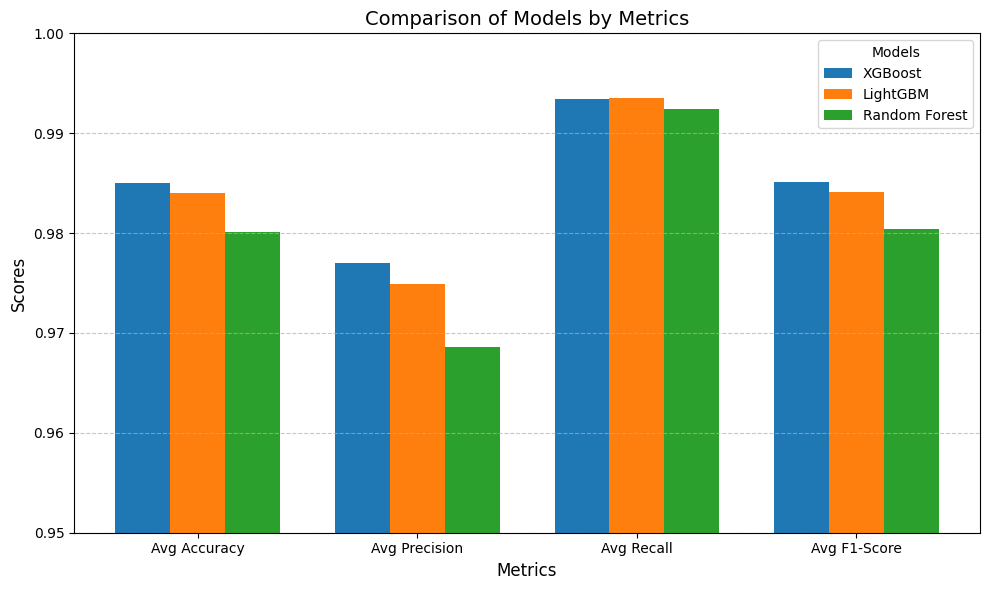

In [118]:
import matplotlib.pyplot as plt
import numpy as np

pddf = accuracy_scores_df_bal.sort_values(by='Avg Accuracy', ascending=False).head(3)

# Extract models and metric values from pddf
models = pddf['Model'].values
metrics = ['Avg Accuracy', 'Avg Precision', 'Avg Recall', 'Avg F1-Score']
values = [pddf[metric].values for metric in metrics]  # Extract metrics column-wise

# Transpose values for bar plotting
values = np.array(values).T

# Plotting
x = np.arange(len(metrics))  # Metric positions
bar_width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each model's metrics
for i, (model, model_values) in enumerate(zip(models, values)):
    ax.bar(x + i * bar_width, model_values, width=bar_width, label=model)

# Customize the plot
ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Comparison of Models by Metrics", fontsize=14)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend(title="Models", fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Set y-axis range
ax.set_ylim(0.95, 1.0)

# Show the plot
plt.tight_layout()
plt.show()

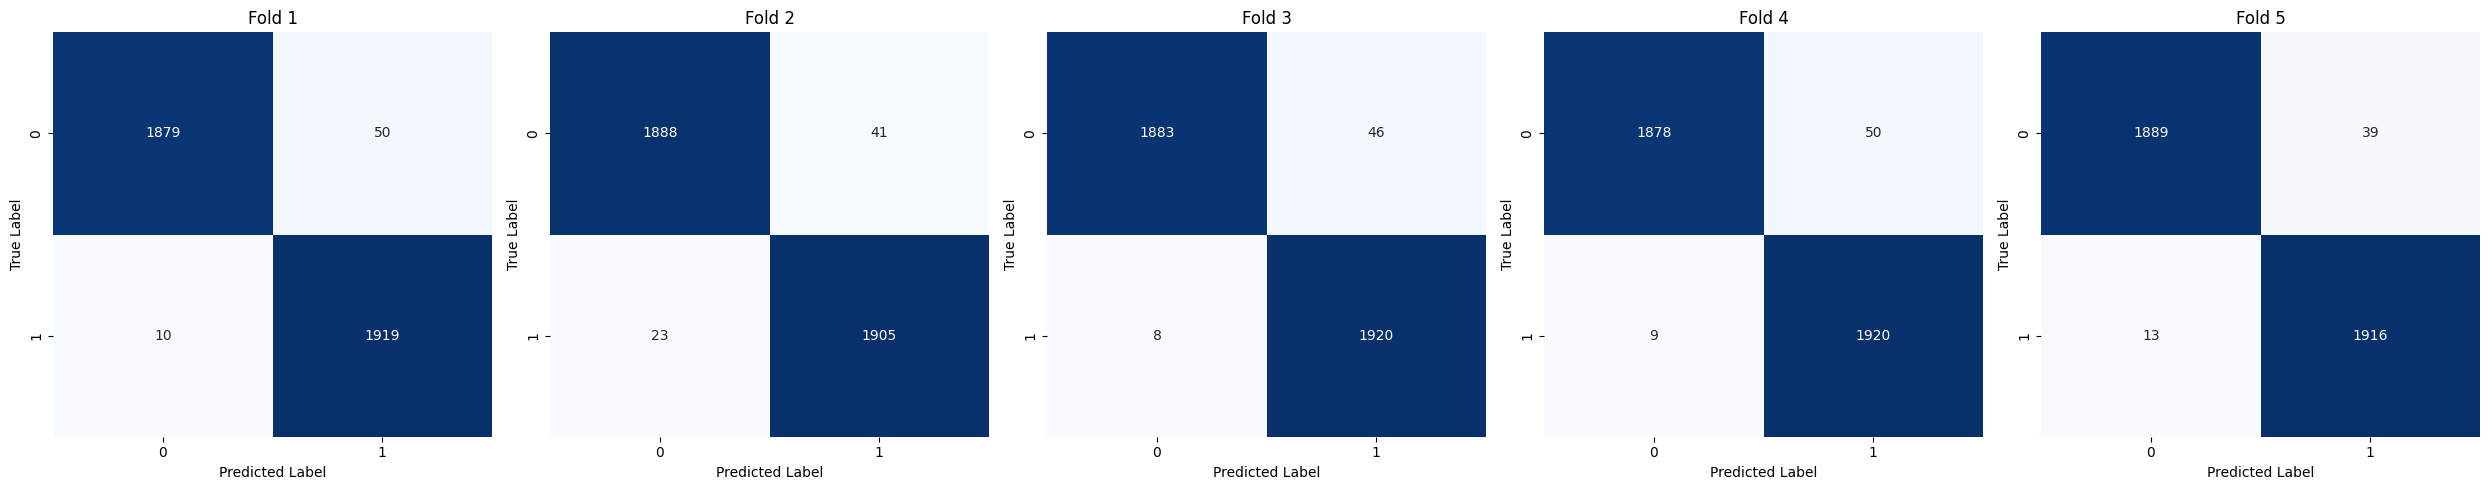

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

# Initialize Stratified K-Fold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Create a figure for confusion matrix plots
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 5 subplots for 5 folds

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Split the data into train and test sets for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb_model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    ax = axes[fold]  # Get the axis for the current fold
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"Fold {fold + 1}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

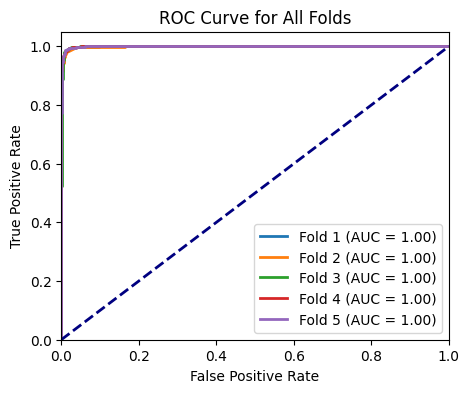

AUC for Fold 1: 0.9990
AUC for Fold 2: 0.9986
AUC for Fold 3: 0.9985
AUC for Fold 4: 0.9993
AUC for Fold 5: 0.9988


In [138]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# StratifiedKFold for splitting the data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Initialize an empty list to store AUC scores for each fold
auc_scores = []

# Create a figure to plot all ROC curves in one plot
plt.figure(figsize=(5, 4))

# Iterate through each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Predict probabilities for ROC curve (probabilities for the positive class)
    y_prob = xgb_model.predict_proba(X_test)[:, 1]  # For binary classification, taking probabilities of class '1'

    # Calculate the ROC curve and AUC for this fold
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve for the current fold on the same plot
    plt.plot(fpr, tpr, lw=2, label=f'Fold {fold} (AUC = {roc_auc:.2f})')

    # Store AUC score for later reference
    auc_scores.append(roc_auc)

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Add plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Folds')
plt.legend(loc="lower right")

# Show the plot
plt.show()

# Print the AUC scores for each fold
for fold, auc in enumerate(auc_scores, 1):
    print(f"AUC for Fold {fold}: {auc:.4f}")

### Saving model as .pkl file

In [121]:
import pickle

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss").fit(X,y)

# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/Excelr Projects/Predictive Maintenance dataset/xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

from sklearn.preprocessing import StandardScaler

c = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

scaler = StandardScaler()

scaler.fit(dfohe_over_samp[c])

# Saveing scaler object
with open('/content/drive/MyDrive/Colab Notebooks/Excelr Projects/Predictive Maintenance dataset/std_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# ------------------------ END ---------------------------